In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [2]:
def create_data():
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img)
            img_resized = img_array
            training_data.append([img_resized, category_index])
    return training_data

In [3]:
training_data = create_data()

In [4]:
import random

# to mix the data
random.shuffle(training_data)

In [5]:
X = [] # the X_training
Y = [] # the Y_training

In [6]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [7]:
X = np.array(X)
# X = X.reshape(X.shape[0], X.shape[1], X.shape[2], X.shape[3],1)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(651, 224, 224, 3)
(651,)


In [8]:
import tensorflow as tf
X = X / 255.0

[[[0.99215686 0.99215686 0.99215686]
  [0.98823529 0.98823529 0.98823529]
  [1.         1.         1.        ]
  ...
  [0.9254902  0.9254902  0.9254902 ]
  [0.9372549  0.9372549  0.9372549 ]
  [0.93333333 0.93333333 0.93333333]]

 [[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.92941176 0.92941176 0.92941176]
  [0.93333333 0.93333333 0.93333333]
  [0.9254902  0.9254902  0.9254902 ]]

 [[1.         1.         1.        ]
  [0.98823529 0.98823529 0.98823529]
  [0.98823529 0.98823529 0.98823529]
  ...
  [0.9372549  0.9372549  0.9372549 ]
  [0.9372549  0.9372549  0.9372549 ]
  [0.9254902  0.9254902  0.9254902 ]]

 ...

 [[0.9254902  0.9254902  0.9254902 ]
  [0.93333333 0.93333333 0.93333333]
  [0.92941176 0.92941176 0.92941176]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.98823529 0.98823529 0.98823529]
  [0.99607843 0.99607843 0.99607843]]

 [[0.92941176 0.92941176 0.92941176]
  [0.94117647 0.94117647 0.94117647]


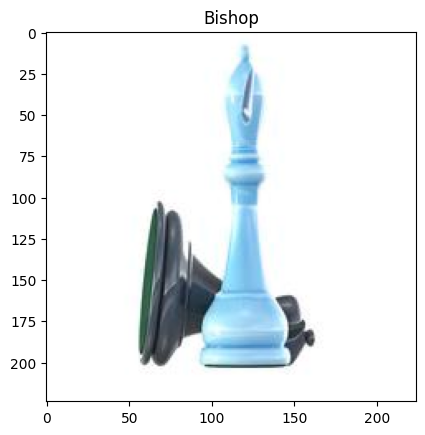

In [9]:
print(X[1])
index_test = 67
plt.imshow(X[index_test])
plt.title(CATEGORIES[Y[index_test]])
plt.show()

In [10]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [11]:
print(X.shape[1:])

(224, 224, 3)


In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64 , (3,3), input_shape=X.shape[1:], activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,964,965 (45.64 MB)

 Trainable params: 11,964,965 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 994ms/step - accuracy: 0.1897 - loss: 2.0840
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 942ms/step - accuracy: 0.2773 - loss: 1.6161
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 961ms/step - accuracy: 0.3554 - loss: 1.4975
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 957ms/step - accuracy: 0.4216 - loss: 1.3834
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 924ms/step - accuracy: 0.5386 - loss: 1.2303
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 942ms/step - accuracy: 0.6575 - loss: 1.0673
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 943ms/step - accuracy: 0.6713 - loss: 0.9911
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 942ms/step - accuracy: 0.6966 - loss: 0.8513
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 945ms/step - accuracy: 0.7961 - loss: 0.6881
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7840 - loss: 0.7023
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 941ms/step - accuracy: 0.8090 - loss: 0.6385
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 9

In [15]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.4683 - loss: 1.5601
0.45038166642189026


In [16]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


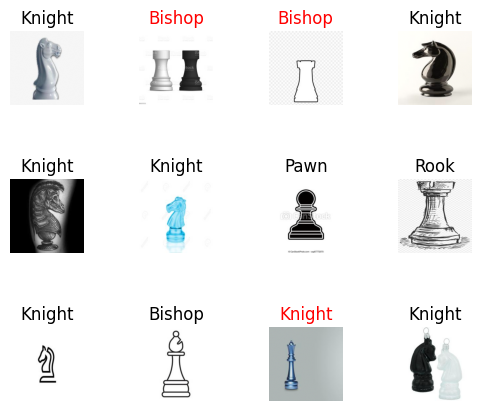

In [20]:
x = 70
y = x+12
# printing some pictures of the x_test and it's predictions as title
false_values = 0
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'black'
    if np.argmax(predictions[i]) != Y_test[i]:
        false_values = false_values + 1
        color = 'red'
    plt.title(CATEGORIES[np.argmax(predictions[i])], color=color)
plt.show()